# Imports

In [1]:
# Required for autocnet imports
import os
os.environ['ISISROOT'] = '/usgs/cpkgs/anaconda3_linux/envs/isis3.9.0'

# Autocnet Imports
from autocnet.graph.network import NetworkCandidateGraph
from autocnet.io.db.model import Overlay

# Helpful Python Modules
import matplotlib.pyplot as plt  #     plotting package
import numpy as np               #     numerical computing package

# Ingest Network

You can either upload information from an isis control network to a database or use an existing database. Both methods require a configuration file (See from_cnet.ipynb for configuration file expectations)

In [2]:
config_path = 'config.yml'

### If creating a database

In [3]:
# lis_path = "AS15_landingsite_apollolro.lis"
# cnet_path = "AS15_landingsite_apollolro_jig1.net"

# ncg = NetworkCandidateGraph.from_filelist(lis_path, config_path, clear_db=True)
# ncg.place_points_from_cnet(cnet_path) 

### If database exists

In [4]:
ncg = NetworkCandidateGraph();
ncg.config_from_file(config_path);
ncg.from_database();

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/sqlalchemy/orm/relationships.py:1917: SAWarning: Setting backref / back_populates on relationship Points.overlay to refer to viewonly relationship Overlay.points will be deprecated in SQLAlchemy 1.4, and will be disallowed in a future release.  viewonly relationships should not be mutated (this warning may be suppressed after 10 occurrences)
  (self, other),
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/sqlalchemy/orm/relationships.py:1917: SAWarning: Setting backref / back_populates on relationship Overlay.points to refer to viewonly relationship Points.overlay will be deprecated in SQLAlchemy 1.4, and will be disallowed in a future release.  viewonly relationships should not be mutated (this warning may be suppressed after 10 occurrences)
  (self, other),


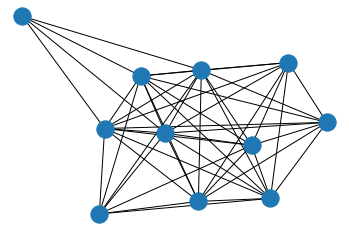

In [5]:
ncg.plot(); # check ncg is populated

# Check For Empty Overlaps

### Function Documentation

In [6]:
ncg.empty_overlays?

In [7]:
ncg.overlays?

### Run Command Visualize Results

Review the function documentation (noticing the argument defaults) and run the cell below. Alter the valid point filters and/or the size_threshold.

By default, a valid point is defined as Points.ignore==False, which converts to filters={'ignore':False}. This network contains a mix of constrained (pointtype=3) and free points (pointtype=2), corresponding with ground and relative control points. Try passing a 'filters' kwarg to find overlaps that do not contain non-ignored, relative control points.

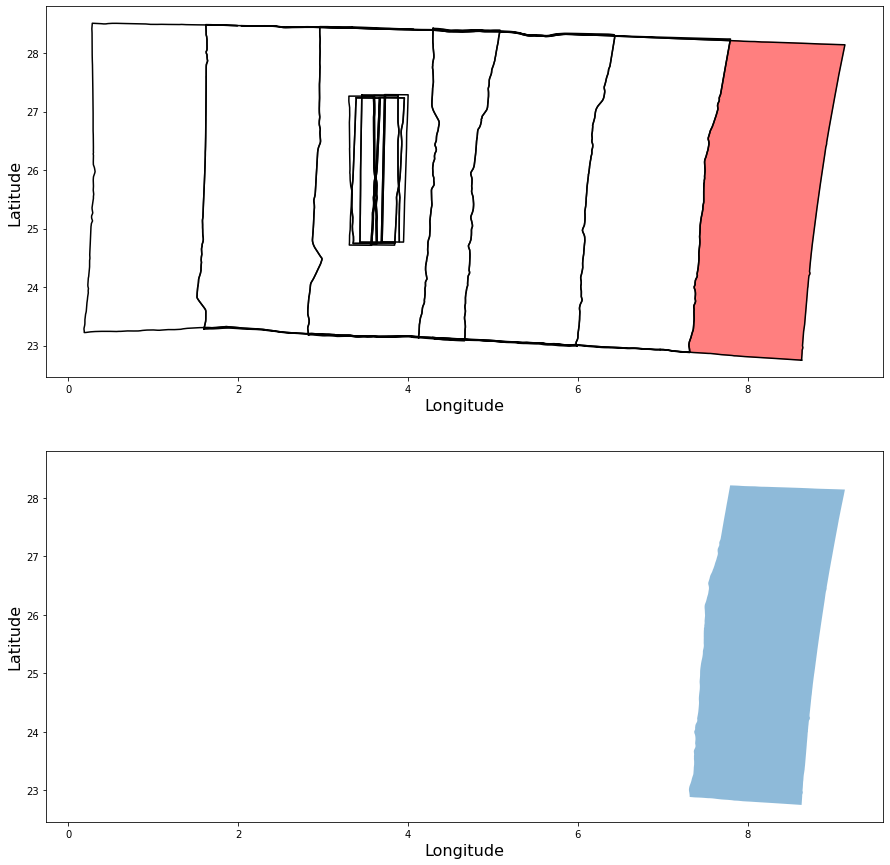

In [8]:
overlays_wo_pts = ncg.empty_overlays(filters={'ignore': False}, size_threshold=0.05)
overlays = ncg.overlays(size_threshold=0.001)

#################### Plotting ####################
fig, axs = plt.subplots(2, 1, figsize=(15, 15))

# plot connected overlaps
for o in overlays:
    x, y = o.geom.exterior.xy
    axs[0].plot(x, y, c='black')

# plot empty overlaps
for o in overlays_wo_pts:
    x, y = o.geom.exterior.xy
    axs[0].fill(x, y, c='red', alpha=0.5)
    axs[1].fill(x, y, alpha=0.5)

# plot properties
axs[0].set_xlabel('Longitude', size=16);
axs[0].set_ylabel('Latitude', size=16);
axs[1].set_xlabel('Longitude', size=16);
axs[1].set_ylabel('Latitude', size=16);
axs[1].set_xlim(axs[0].get_xlim());
axs[1].set_ylim(axs[0].get_ylim());

# Check Overlay Fully Connectivity

The above function only looks at the number of points residing in an overlap. If you would like to evaluate to effective connectivity of an overlap, use the following function.


### Function Documentation

In [9]:
ncg.overlay_connection?

### Run function

In [10]:
oid = 5
missing_edges = ncg.overlay_connection(oid)
print(missing_edges)

[(2, 3), (2, 4), (2, 5), (2, 6), (2, 8), (2, 11), (3, 4), (3, 5), (3, 6), (3, 8), (3, 11), (4, 5), (4, 6), (4, 8), (4, 11), (5, 6), (5, 8), (5, 11)]


In [11]:
with ncg.session_scope() as session:
    oids = session.query(Overlay.id).all()
    for oid in oids:
        oid = oid[0]
        missing_edges = ncg.overlay_connection(oid)
        print(missing_edges)
        print()

Overlap 1 is empty
[]

Overlap 2 is empty
[]

Overlap 3 is empty
[]

Overlap 4 is empty
[]

Overlap 7 is empty
[]

[(2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 10), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 10), (4, 5), (4, 6), (4, 7), (4, 8), (4, 10), (5, 6), (5, 7), (5, 8), (5, 10)]

Overlap 9 is empty
[]

Overlap 10 is empty
[]

Overlap 11 is fully connected
[]

Overlap 12 is empty
[]

Overlap 14 is empty
[]

[(2, 3), (2, 4), (2, 5), (2, 6), (2, 8), (2, 11), (3, 4), (3, 5), (3, 6), (3, 8), (3, 11), (4, 5), (4, 6), (4, 8), (4, 11), (5, 6), (5, 8), (5, 11)]

Overlap 6 is empty
[]

Overlap 15 is empty
[]

[(2, 10), (3, 10), (4, 10), (5, 10)]

Overlap 16 is empty
[]

Overlap 17 is empty
[]

Overlap 18 is empty
[]

Overlap 19 is empty
[]

Overlap 21 is empty
[]

Overlap 22 is empty
[]

Overlap 23 is empty
[]

[(2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 11), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 11), (4, 5), (4, 6), (4, 7), (4, 8), (4, 11), (5, 6), (5, 7), (5, 8),